<a href="https://colab.research.google.com/github/lanashin/CST2312/blob/main/CST3512Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [30]:
file = "/content/Bitcoin_Historical_Data_Investing.csv"
data = pd.read_csv(file)

In [31]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 18, 2022","40,838.0","39,700.0","41,095.0","38,577.0",487.59M,2.86%
1,"Apr 17, 2022","39,703.0","40,382.0","40,599.0","39,561.0",210.01M,-1.68%
2,"Apr 16, 2022","40,382.0","40,571.0","40,691.0","40,003.0",151.31M,-0.44%
3,"Apr 15, 2022","40,560.0","39,936.0","40,850.0","39,781.0",233.09M,1.56%
4,"Apr 14, 2022","39,936.0","41,133.0","41,494.0","39,585.0",294.29M,-2.91%


In [32]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
3300,"Apr 05, 2013",142.3,132.1,144.9,130.2,68.59K,7.72%
3301,"Apr 04, 2013",132.1,135.0,142.1,116.4,88.36K,-2.13%
3302,"Apr 03, 2013",135.0,118.0,147.0,110.0,152.71K,14.43%
3303,"Apr 02, 2013",118.0,104.0,118.4,99.0,81.29K,13.44%
3304,"Apr 01, 2013",104.0,93.0,106.0,92.2,90.56K,11.79%


In [33]:
# covert to datetime
data['Date'] = pd.to_datetime(data['Date'])
# show the types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3305 entries, 0 to 3304
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3305 non-null   datetime64[ns]
 1   Price     3305 non-null   object        
 2   Open      3305 non-null   object        
 3   High      3305 non-null   object        
 4   Low       3305 non-null   object        
 5   Vol.      3305 non-null   object        
 6   Change %  3305 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 180.9+ KB


In [34]:
data['Price']=data['Price'].str.replace(',','')
data['Open']=data['Open'].str.replace(',','')
data['High']=data['High'].str.replace(',','')
data['Low']=data['Low'].str.replace(',','')
data['Change %']=data['Change %'].str.replace('%','')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-04-18,40838.0,39700.0,41095.0,38577.0,487.59M,2.86
1,2022-04-17,39703.0,40382.0,40599.0,39561.0,210.01M,-1.68
2,2022-04-16,40382.0,40571.0,40691.0,40003.0,151.31M,-0.44
3,2022-04-15,40560.0,39936.0,40850.0,39781.0,233.09M,1.56
4,2022-04-14,39936.0,41133.0,41494.0,39585.0,294.29M,-2.91


In [36]:
data.rename(columns={'Change %':'Change'})

,Date,Price,Open,High,Low,Vol.,Change
0,2022-04-18,40838.0,39700.0,41095.0,38577.0,487.59M,2.86
1,2022-04-17,39703.0,40382.0,40599.0,39561.0,210.01M,-1.68
2,2022-04-16,40382.0,40571.0,40691.0,40003.0,151.31M,-0.44
3,2022-04-15,40560.0,39936.0,40850.0,39781.0,233.09M,1.56
4,2022-04-14,39936.0,41133.0,41494.0,39585.0,294.29M,-2.91
...,...,...,...,...,...,...,...
3300,2013-04-05,142.3,132.1,144.9,130.2,68.59K,7.72
3301,2013-04-04,132.1,135.0,142.1,116.4,88.36K,-2.13
3302,2013-04-03,135.0,118.0,147.0,110.0,152.71K,14.43
3303,2013-04-02,118.0,104.0,118.4,99.0,81.29K,13.44


In [37]:
#convert to time series:
ts = data['Price']
ts.head(10)

0    40838.0
1    39703.0
2    40382.0
3    40560.0
4    39936.0
5    41133.0
6    40078.0
7    39497.0
8    42138.0
9    42767.0
Name: Price, dtype: object

In [38]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [39]:
from datetime import datetime
con=data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2022-04-18', '2022-04-17', '2022-04-16', '2022-04-15',
               '2022-04-14', '2022-04-13', '2022-04-12', '2022-04-11',
               '2022-04-10', '2022-04-09',
               ...
               '2013-04-10', '2013-04-09', '2013-04-08', '2013-04-07',
               '2013-04-06', '2013-04-05', '2013-04-04', '2013-04-03',
               '2013-04-02', '2013-04-01'],
              dtype='datetime64[ns]', name='Date', length=3305, freq=None)

In [40]:
#convert to time series:
ts = data['Price']
ts.head()

Date
2022-04-18    40838.0
2022-04-17    39703.0
2022-04-16    40382.0
2022-04-15    40560.0
2022-04-14    39936.0
Name: Price, dtype: object

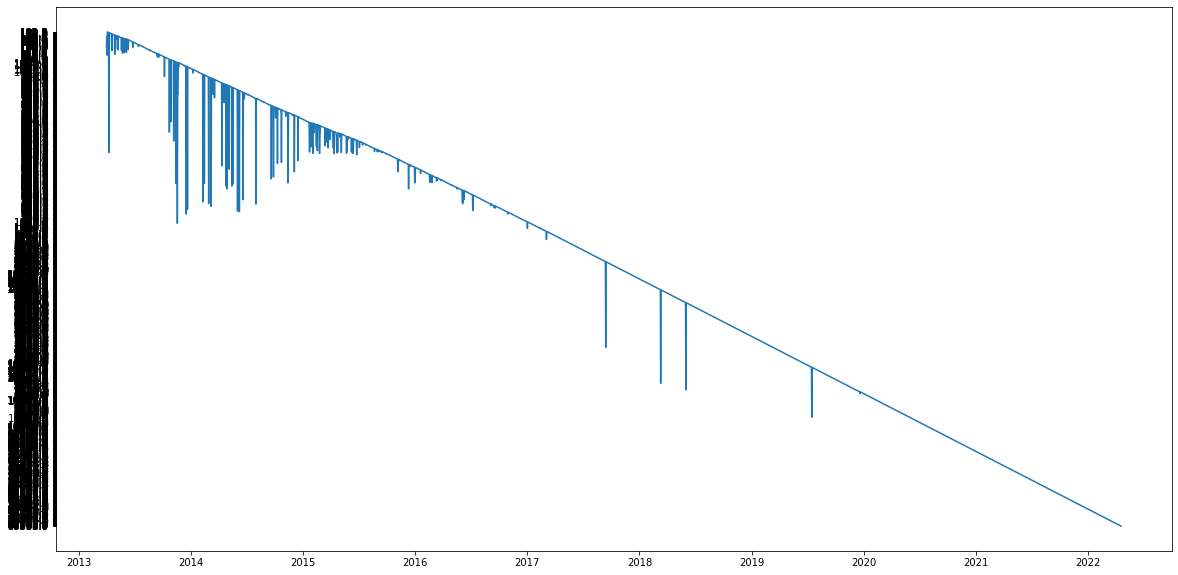

In [41]:
plt.figure(figsize=(20,10))
plt.plot(ts)

In [42]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [43]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)    

    

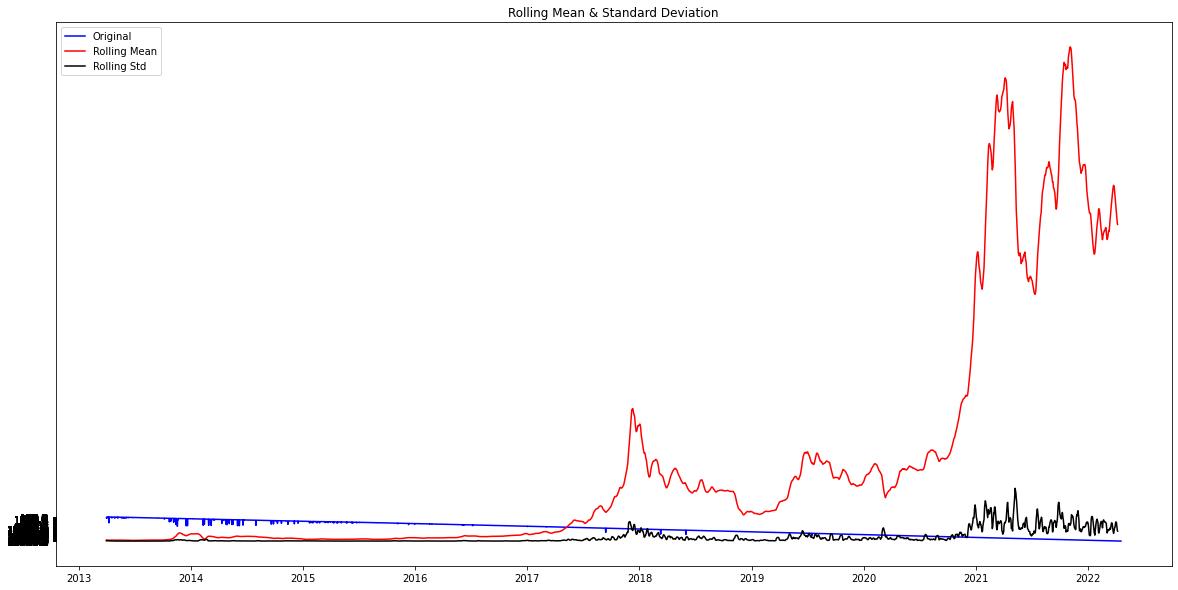

Results of Dickey-Fuller Test:


TypeError: ignored

In [44]:
plt.figure(figsize=(20,10))
test_stationarity(ts)

In [46]:
ts_log = np.log(ts)
plt.figure(figsize=(20,10))
plt.plot(ts_log)

TypeError: ignored